In [10]:
import numpy as np
import networkx as nx

G = nx.Graph()
blue, orange, green = "#1f77b4", "#ff7f0e", "#2ca02c"

G.add_nodes_from(
    [
        (1, {"color": blue}),
        (2, {"color": orange}),
        (3, {"color": blue}),
        (4, {"color": green}),
    ]
)
G.add_edges_from([(1, 2), (2, 3), (1, 3), (3, 4)])
A = np.asanyarray(nx.adjacency_matrix(G).todense())
A


def build_graph_color_label_represantation(G, mapping_dict):
    one_hot_idxs = np.array(
        [mapping_dict[v] for v in nx.get_node_attributes(G, "color").values()]
    )
    one_hot_encoding = np.zeros((one_hot_idxs.size, len(mapping_dict)))
    one_hot_encoding[np.arange(one_hot_idxs.size), one_hot_idxs] = 1
    return one_hot_encoding


color_mapping_dict = {green: 0, blue: 1, orange: 2}

X = build_graph_color_label_represantation(G, color_mapping_dict)
X

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

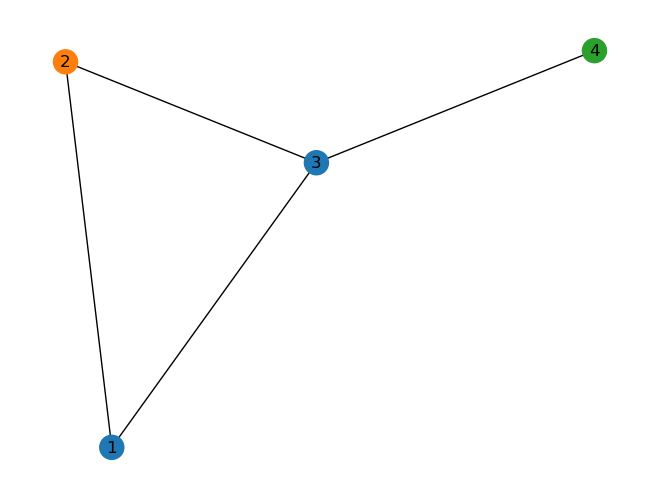

In [11]:
color_map = nx.get_node_attributes(G, "color").values()
nx.draw(G, with_labels=True, node_color=color_map)